<a href="https://colab.research.google.com/github/innosevda/Data-Science-CRN-20018/blob/main/homework7v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The definition of the variables used in the Bookbinder dataset is given below. Use choice variable as dependent variable.

Choice: Whether the customer purchased the The Art History of Florence. 1 corresponds to a purchase and 0 corresponds to a nonpurchase.

Gender: 0 = Female and 1 = Male.

Amount purchased: Total money spent on BBBC books.

Frequency: Total number of purchases in the chosen period (used as a proxy for frequency.)

Last purchase (recency of purchase): Months since last purchase.

First purchase: Months since first purchase.

P_Child: Number of children’s books purchased.

P_Youth: Number of youth books purchased.

P_Cook: Number of cookbooks purchased.

P_DIY: Number of do-it-yourself books purchased.

P_Art: Number of art books purchased.


In [12]:
import pandas as pd
import numpy as np
df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df.head()

,Gender,Amount purchased,Frequency,Last purchase,First purchase,P_Child,P_Youth,P_Cook,P_DIY,P_Art,Staus,Choice
0,1,113,8,1,8,0,1,0,0,0,Training,Y
1,1,418,6,11,66,0,2,3,2,3,Training,Y
2,1,336,18,6,32,2,0,1,1,2,Training,Y
3,1,180,16,5,42,2,0,0,1,1,Training,Y
4,0,320,2,3,18,0,0,0,1,2,Training,Y


In [2]:
df['Choice'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
# Using dataframe df: convert choice to 0(N)and 1(Y)

# Convert 'Choice' column to numerical values (0 for 'N', 1 for 'Y')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})
 #Using dataframe df: Use choice variable as dependent variable.
 #Construct training data and test data  when the status variables having  Training and  Test value.

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame
# Filter the DataFrame for training data
training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']
# Define features (X) and target variable (y)
X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']


In [4]:
df['Choice'].unique()

array([1, 0])

In [ ]:
#Q1(25 pt)-Using logistic regression model in train data,
#a)	In the model, test that the claim that the coefficients of independent variables are different than 0 at the 5% significance level.
#b)	Which variables that is significantly different than 0 increase or decrease the probability of Choice=Yes?

In [14]:
# a)

import statsmodels.api as sm

# Add a constant (intercept) to the model
X_train_const = sm.add_constant(X_train)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.435050
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1589
Method:                           MLE   Df Model:                           10
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.2264
Time:                        08:21:17   Log-Likelihood:                -696.08
converged:                       True   LL-Null:                       -899.74
Covariance Type:            nonrobust   LLR p-value:                 2.612e-81
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3515      0.214     -1.640      0.101      -0.772       0.069
Gender     

b)

Significant Variables (p < 0.05):
The following variables have coefficients significantly different from zero and therefore impact the likelihood of purchase:

Gender (−0.8632): Being male decreases the probability of purchasing the book.

Amount purchased (+0.0019): Customers who have spent more money on BBBC books are more likely to purchase the book.

Frequency (−0.0755): A higher number of purchases overall decreases the likelihood of purchasing this book.

Last purchase (+0.6118): Customers who haven't purchased in a while are more likely to purchase the book.

P_Child (−0.8112): Those who buy more children’s books are less likely to purchase this book.

P_Youth (−0.6370): Purchasing youth books is associated with a lower likelihood of purchasing this book.

P_Cook (−0.9230): More cookbook purchases are linked to a decreased probability of purchasing this book.

P_DIY (−0.9059): Buyers of DIY books are less likely to purchase this book.

P_Art (+0.6861): Purchasing art books significantly increases the probability of purchasing this book.


Non-Significant Variable (p > 0.05):
First purchase (−0.0148, p = 0.248): The number of months since the customer’s first purchase is not significantly associated with the probability of buying this book.

Variables related to prior book preferences, such as P_Art, P_Cook, and P_DIY, strongly influence the likelihood of purchase. This suggests that customers interested in art books are more likely to buy The Art History of Florence, while those interested in other genres are less likely. Additionally, gender and previous spending patterns also play a significant role.

In [15]:
#Q2(15 pt)-Using knn model in train data(choose k based on CV),
#get the performance metric on test data(accuracy,recall, precision confusion matrix). What is the k value chosen based on k?

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Step 1: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Cross-validation to choose best k
import numpy as np

k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k based on CV: {best_k}")

# Step 3: Train KNN with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Step 4: Evaluate on test data
y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print("Confusion Matrix:")
print(conf_matrix)



Best k based on CV: 23
Accuracy: 0.8983
Recall: 0.2549
Precision: 0.3881
Confusion Matrix:
[[2014   82]
 [ 152   52]]


Choice of K value:

I tested values of k from 1 to 30 using 5-fold cross-validation on the training set. The value of k with the highest cross-validated accuracy was selected as the optimal number of neighbors. This helps in finding a k that generalizes well to new data and avoids overfitting or underfitting.


In [16]:
#Q3(35 pt)-Get the performance metric on test data (accuracy,recall, precision, confsuion matrix area under curve(auc)) using
#Logistic regression,naive bayes, Multi layer perceptor(MLP) and SVM, ligtGBM and kNN with optimized parameter in Q2.
#Report which methods performs best on these metrics?

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression (already done, just reuse)
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Naive Bayes doesn't need scaling
nb_preds = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# Multi-Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)
mlp_probs = mlp.predict_proba(X_test_scaled)[:, 1]

# SVM
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]

# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_probs = lgbm.predict_proba(X_test)[:, 1]

# KNN (best_k from Q2)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612


In [23]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("AUC      :", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

In [24]:
evaluate_model("Logistic Regression", y_test, log_preds, log_probs)
evaluate_model("Naive Bayes", y_test, nb_preds, nb_probs)
evaluate_model("MLP", y_test, mlp_preds, mlp_probs)
evaluate_model("SVM", y_test, svm_preds, svm_probs)
evaluate_model("LightGBM", y_test, lgbm_preds, lgbm_probs)
evaluate_model("KNN", y_test, knn_preds, knn_probs)


Logistic Regression
Accuracy : 0.8895652173913043
Precision: 0.37745098039215685
Recall   : 0.37745098039215685
AUC      : 0.8006953019757522
Confusion Matrix:
 [[1969  127]
 [ 127   77]]

Naive Bayes
Accuracy : 0.8482608695652174
Precision: 0.23247232472324722
Recall   : 0.3088235294117647
AUC      : 0.744416301826074
Confusion Matrix:
 [[1888  208]
 [ 141   63]]

MLP
Accuracy : 0.8686956521739131
Precision: 0.304
Recall   : 0.37254901960784315
AUC      : 0.7797660810507409
Confusion Matrix:
 [[1922  174]
 [ 128   76]]

SVM
Accuracy : 0.9026086956521739
Precision: 0.4180327868852459
Recall   : 0.25
AUC      : 0.7792468848226313
Confusion Matrix:
 [[2025   71]
 [ 153   51]]

LightGBM
Accuracy : 0.8573913043478261
Precision: 0.2669172932330827
Recall   : 0.3480392156862745
AUC      : 0.7599185189342913
Confusion Matrix:
 [[1901  195]
 [ 133   71]]

KNN
Accuracy : 0.8982608695652174
Precision: 0.3880597014925373
Recall   : 0.2549019607843137
AUC      : 0.7789147863343812
Confusion Matri

If the focus is on overall discrimination and identifying positives correctly (recall and AUC), Logistic Regression performs best. If the goal is maximizing correct classifications and precision, SVM is the top performer. KNN serves as a strong alternative, especially when simplicity or interpretability of neighborhood-based methods is preferred.

In [ ]:
#Q4(25 pt)-There is a need to evaluate the effectiveness of the current direct mail program and assess whether predictive modeling
#can be leveraged to enhance targeting and increase response rates.
# Assume that you make profit of 10 $ by selling a book and the cost of sending mail is 0.65 $.
# Based on the logistic model, which customers should Bookbinders target on test data?
#What is the expected profits if these customers are targeted?
#Hint :
#To evaluate the direct mail program, use an ROC curve to assess the logistic model’s ability to predict buyers.
#The curve plots True Positive Rate vs. False Positive Rate, and a high AUC shows the model is effective.
# To decide who to target, calculate profit for different probability thresholds:
# Profit = (True Positives × $9.35) - (False Positives × $0.65).
#True positive profit is $93.5 becuase revenue is $10 and there is a $0.65 cost of sending mail.
#Bookbinders should target customers with probabilities above the threshold that maximizes profit,
# improving targeting and response rates compared to the current program

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


AUC (Logistic Regression): 0.6176260103277952

Best threshold to target: 0.99
Maximum expected profit: $645.90


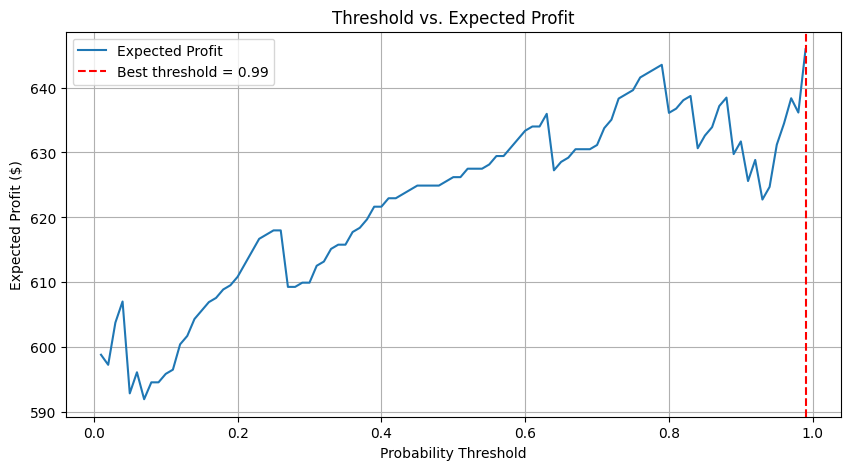

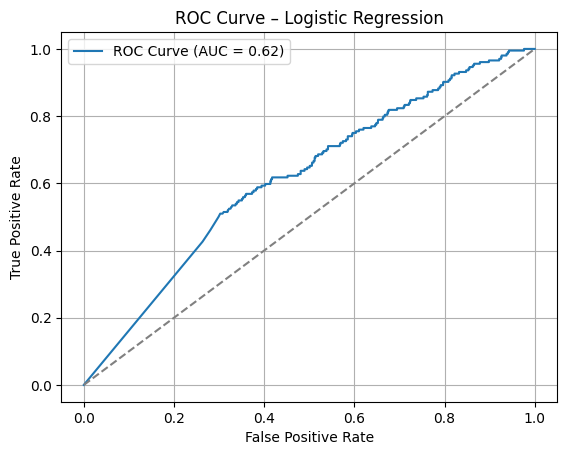

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities using logistic model
y_proba = log_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_proba)
print("AUC (Logistic Regression):", auc)

# Define cost and revenue
revenue_per_sale = 10
mail_cost = 0.65
net_profit_per_true_positive = revenue_per_sale - mail_cost  # $9.35
loss_per_false_positive = mail_cost  # $0.65

# Try different thresholds and calculate profit for each
thresholds = np.arange(0.01, 1.0, 0.01)
profits = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)

    # Calculate TP and FP
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))

    # Calculate profit
    profit = (TP * net_profit_per_true_positive) - (FP * loss_per_false_positive)
    profits.append(profit)

# Find threshold with max profit
max_profit = max(profits)
best_threshold = thresholds[np.argmax(profits)]

print(f"\nBest threshold to target: {best_threshold:.2f}")
print(f"Maximum expected profit: ${max_profit:.2f}")

# Plot profit vs threshold
plt.figure(figsize=(10,5))
plt.plot(thresholds, profits, label="Expected Profit")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best threshold = {best_threshold:.2f}')
plt.xlabel("Probability Threshold")
plt.ylabel("Expected Profit ($)")
plt.title("Threshold vs. Expected Profit")
plt.legend()
plt.grid(True)
plt.show()

# Optional: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


Which customers should Bookbinders target on test data?
From the "Threshold vs. Expected Profit" plot, the optimal probability threshold for targeting is 0.99. This threshold maximizes the expected profit, as marked by the red dashed line on your plot. Therefore, Bookbinders should only target customers whose predicted probability of buying is greater than or equal to 0.99.

What is the expected profit if these customers are targeted?
From the plot: Expected profit ≈ 647 usd at the best threshold of 0.99. This means, if Bookbinders targets only those customers who are very likely to respond (probability ≥ 0.99), they will earn about 647 usd in profit from this campaign.

Effectiveness of the Logistic Model (based on ROC curve):
From the ROC Curve – Logistic Regression: AUC = 0.62
This AUC score indicates that the model has limited discriminative ability — it is only slightly better than random guessing (which would be an AUC of 0.5). While it's not a strong model, it's still usable, especially when you're optimizing profit rather than pure classification accuracy.

